In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Retrieve training datasets

In [7]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [9]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)

(78418, 30, 30, 3) (78418,)
(62734, 30, 30, 3) (15684, 30, 30, 3) (62734,) (15684,)


# Build Model

In [10]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(classes, activation='softmax'))

# Train Model

In [11]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("road_sign.h5")

Epoch 1/15
1961/1961 [==============================] - 231s 117ms/step - loss: 1.1844 - accuracy: 0.6768 - val_loss: 0.1912 - val_accuracy: 0.9493
Epoch 2/15
1961/1961 [==============================] - 242s 123ms/step - loss: 0.3271 - accuracy: 0.9047 - val_loss: 0.0770 - val_accuracy: 0.9788
Epoch 3/15
1961/1961 [==============================] - 229s 117ms/step - loss: 0.2357 - accuracy: 0.9329 - val_loss: 0.0536 - val_accuracy: 0.9854
Epoch 4/15
1961/1961 [==============================] - 220s 112ms/step - loss: 0.2202 - accuracy: 0.9400 - val_loss: 0.0416 - val_accuracy: 0.9870
Epoch 5/15
1961/1961 [==============================] - 213s 108ms/step - loss: 0.2215 - accuracy: 0.9421 - val_loss: 0.0381 - val_accuracy: 0.9892
Epoch 6/15
1961/1961 [==============================] - 223s 113ms/step - loss: 0.2122 - accuracy: 0.9440 - val_loss: 0.0328 - val_accuracy: 0.9906
Epoch 7/15
1961/1961 [==============================] - 227s 116ms/step - loss: 0.2113 - accuracy: 0.9462 - val_

# Visualize Training

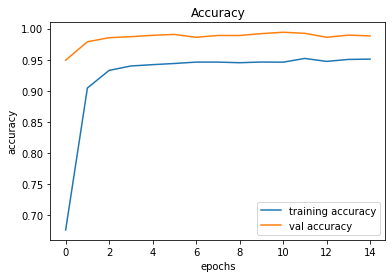

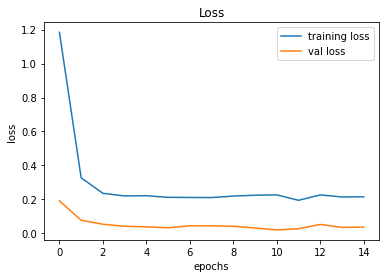

In [12]:
#Accuracy graph
plt.figure(0)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#Loss graph
plt.figure(1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Test with Testing Datasets

In [21]:
#Accuracy on test dataset
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
# print(imgs)
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
# pred = model.predict_classes(X_test)

predict_x=model.predict(X_test) 
pred=np.argmax(predict_x,axis=1)

In [22]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))
model.save('road_sign.h5')

0.9536817102137767


# Try with any images

In [27]:
sign_classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

Populating the interactive namespace from numpy and matplotlib


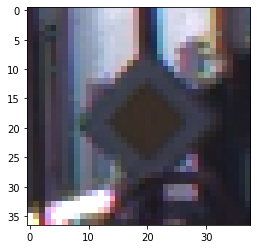

12: Priority road


In [46]:
from tensorflow import keras
model_test = keras.models.load_model('road_sign.h5')

img_path = r"C:\Users\User\Desktop\Test_code\Test\00010.png"
image = Image.open(img_path)
image = image.resize((30,30))
image = np.expand_dims(image, axis=0)
image = np.array(image)
predict_x=model.predict(image) 
pred=np.argmax(predict_x,axis=1)[0]
sign_name = sign_classes[pred+1]

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(img_path)
imgplot = plt.imshow(img)
plt.show()
print(f"{pred}: {sign_name}")